In [1]:
# import libraries
import numpy as  np
import pandas as pd
import  array
import matplotlib.pyplot as plt
import pandas.api.types as  ptypes
import seaborn as sb
import sklearn
from sklearn import preprocessing
import pickle
import warnings
import csv
warnings.filterwarnings('ignore')

In [2]:
# read file
data = pd.read_csv('data/AirPassengers.csv',usecols=[1], engine='python')
data.head()

,#Passengers
0,112
1,118
2,132
3,129
4,121


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


In [4]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
# checks for null values
data.isnull().sum()

#Passengers    0
dtype: int64

In [6]:
# checks for duplicate values
data.duplicated().sum()

26

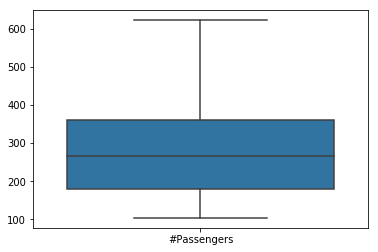

In [7]:
# checks for outliers
import seaborn as sb
sb.boxplot(data=data)

In [8]:
data.head()

,#Passengers
0,112
1,118
2,132
3,129
4,121


In [9]:
data = data.values
data = data.astype('float32')


In [10]:
# normalize the dataset
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [11]:
# import sklearn
# from sklearn.model_selection import train_test_split

# # splitting data into train & test dataset
# train,test=train_test_split(data,test_size=0.4,random_state =False)

# split into train and test sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]


In [12]:
train.shape,test.shape

((96, 1), (48, 1))

In [13]:
# create dataset with 4 time steps and 1 output
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t and Y=t+1
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
trainX.shape,trainY.shape

((91, 4), (91,))

In [16]:
testX.shape,testY.shape

((43, 4), (43,))

In [17]:
from sklearn.linear_model import LinearRegression
# fitting simple linear regression to the training dataset
regressor = LinearRegression(normalize=True)  
regressor.fit( trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
# getting prediction values on train dataset
y_pred_train=regressor.predict(trainX)


In [19]:
# getting predictions on test dataset
y_pred = regressor.predict(testX)
df = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,0.484556,0.435634
1,0.613900,0.474407
2,0.696911,0.635761
3,0.700772,0.677072
4,0.579151,0.656671


In [20]:
y_pred_train=y_pred_train.reshape(-1,1)
y_pred=y_pred.reshape(-1,1)

In [21]:
trainY=trainY.reshape(-1,1)
trainY.shape

(91, 1)

In [22]:
# invert predictions
import math
from sklearn.metrics import mean_squared_error
trainPredict = scaler.inverse_transform(y_pred_train)
# trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(y_pred)
# testY = scaler.inverse_transform([testY])


In [23]:
# sklearn.metrics.accuracy_score(y_test,y_pred)

acc_train=sklearn.metrics.r2_score(trainY,y_pred_train)*100
print("Accuracy of train data =",acc_train)

acc_test=sklearn.metrics.r2_score(testY,y_pred)*100
print("Accuracy of test data =",acc_test)

Accuracy of train data = 90.61382825689431
Accuracy of test data = 66.6560343447696


In [24]:
# calculates error
acc_train=sklearn.metrics.mean_squared_error(trainY,y_pred_train)
print("error on train data =",acc_train)

acc_test=sklearn.metrics.mean_squared_error(testY,y_pred)
print("error on test data =",acc_test)

error on train data = 0.0017247325
error on test data = 0.0074276314


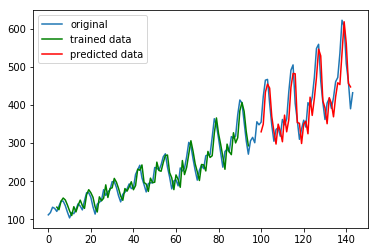

In [25]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data),label='original')
plt.plot(trainPredictPlot,label='trained data',color="green")
plt.plot(testPredictPlot,label='predicted data',color="red")
plt.legend()
plt.show()